<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/Physics%20Models/Worksheet_Plot_Ring_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


# 1

In [ ]:
theta = np.linspace(-50*10**-3,50*10**-3,500)

In [ ]:
I0 = 1

\'$I(\theta)=I_0\cos^2(\pi\cdot m\cos(\theta))$'


In [ ]:
def I_theta(m,theta,I0):
  intensity = I0 * np.cos(np.pi * m* np.cos(theta))**2
  return intensity

##1.a
Plot the RP using m=5000

In [ ]:
#a
m = 5000 #2d/lambda
I = I_theta(m,theta,I0)

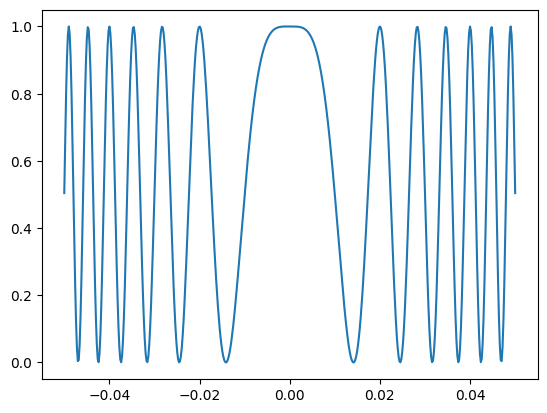

In [ ]:
plt.plot(theta,I)

##1.b
Describe how the RP shifts for m=6000.

In [ ]:
m = 5000 #2d/lambda
Ia = I_theta(m,theta,I0)
m = 6000 #2d/lambda
Ib = I_theta(m,theta,I0)

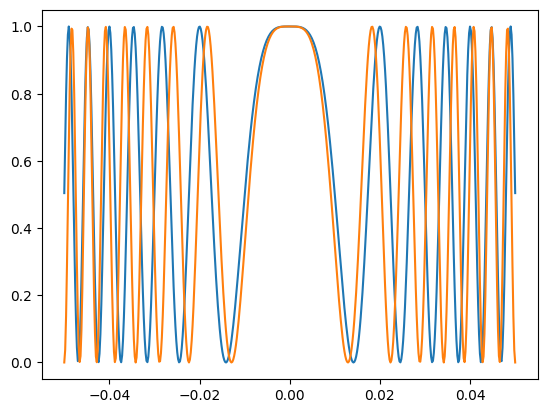

In [ ]:
plt.plot(theta,Ia)
plt.plot(theta,Ib)

In [ ]:
from scipy.signal import find_peaks

In [ ]:
Ia_peaks, _ = find_peaks(Ia[250:])
Ib_peaks, _ = find_peaks(Ib[250:])

In [ ]:
num_peaks = np.min([len(Ia_peaks),len(Ib_peaks)])

In [ ]:
delta_peaks = []
for peak in range(num_peaks):
  delta_peaks.append(Ia_peaks[peak]-Ib_peaks[peak])

In [ ]:
print(delta_peaks)

[8, 13, 15, 17, 20, 21]


In [ ]:
delta_theta = np.array(delta_peaks) * np.median(np.diff(theta))

In [ ]:
print(delta_theta*180/np.pi)

[0.09185696 0.14926756 0.1722318  0.19519604 0.2296424  0.24112452]


**Changing m from 5000 to 6000 caused the peak intensities to be more spaced out, with greater increase in spacing the farthest from center. The first peak moves 0.092 degrees further out, while the last peak moves 0.24 degrees.**

##1.c
Describe how the RP shifts as m is increased in increments of 0.1

In [ ]:
ms = np.arange(6000,6005,.1)

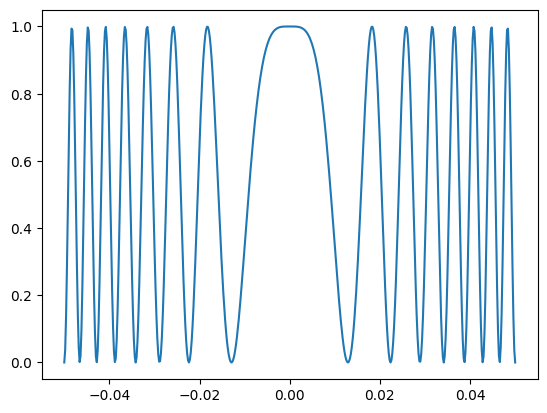

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

ms = np.arange(6000,6005,.1)
Ims = []
for m in ms:
  Ims.append(I_theta(m,theta,I0))  # assuming I_theta is defined

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.plot(theta, Ims[i])

ani = animation.FuncAnimation(fig, animate, frames=len(Ims), interval=200)

HTML(ani.to_html5_video())


**As *m* is increased the peaks of the RP move outward from the center, and the center peak 'waves'.**

#2

$T=[1+F\sin^2(\pi \cdot m \cos(\psi)]^{-1}$

In [ ]:
def T(F,m,psi):
  return (1 + F * np.sin(np.pi * m * np.cos(psi))**2)**-1

$F = \frac{4r^2}{(1-r^2)^2}$

In [ ]:
def coef_of_finesse(r):
  return 4*r**2/(1-r**2)**2

##2.a
Plot the RP using m=5000, r =0.9.

In [ ]:
m = 5000
r = .9
F = coef_of_finesse(r)
psi = np.linspace(-50*10**-3,50*10**-3,4000)
FP_RP = T(F,m,psi)

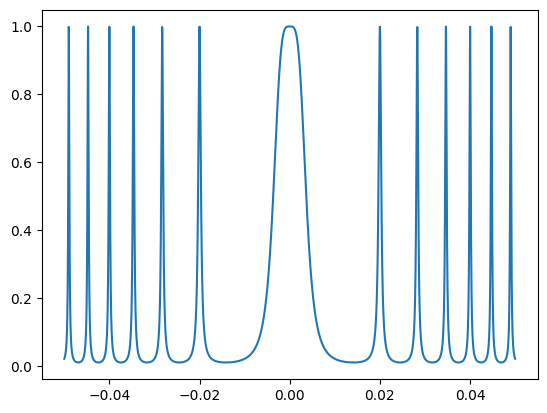

In [ ]:
plt.plot(psi,FP_RP)

##2.b
Describe how the RP compares vs Michelson

In [ ]:
#a
m = 5000 #2d/lambda
I = I_theta(m,psi,I0)
FP_RP = T(F,m,psi)

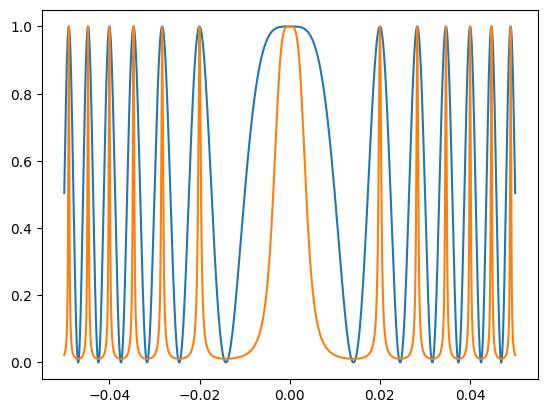

In [ ]:
plt.plot(psi,I)
plt.plot(psi,FP_RP)

**The Fabry_Perot RP is much sharper than the Michelson, while they occur with the same spacing.**

##2c.
 Describe how the RP shifts for m=6000.

In [ ]:

r = .9
F = coef_of_finesse(r)
psi = np.linspace(-50*10**-3,50*10**-3,4000)
FP_RP = T(F,m,psi)

In [ ]:
m = 5000
FP_RPa = T(F,m,psi)
m = 6000
FP_RPb = T(F,m,psi)

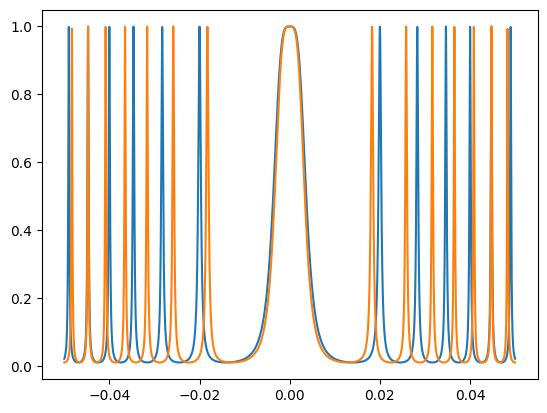

In [ ]:
plt.plot(psi,FP_RPa)
plt.plot(psi,FP_RPb)

In [ ]:
FP_RPa_peaks, _ = find_peaks(FP_RPa[2000:])
FP_RPb_peaks, _ = find_peaks(FP_RPb[2000:])

In [ ]:
num_peaks = np.min([len(FP_RPa_peaks),len(FP_RPb_peaks)])

In [ ]:
delta_peaks = []
for peak in range(num_peaks):
  delta_peaks.append(FP_RPa_peaks[peak]-FP_RPb_peaks[peak])

In [ ]:
print(delta_peaks)

[8, 13, 15, 17, 20, 21]


In [ ]:
delta_psi = np.array(delta_peaks) * np.median(np.diff([psi]))

In [ ]:
print(delta_psi*180/np.pi)

[0.09885993 0.14184251 0.17336307 0.19915262 0.22350942 0.24500071]


**The RP shifts going from m=5000 to m=6000, with fringes shifting away from the center. Fringe peaks closer to the center move out less than those away from the center. The magnitude of the change in degrees for each fringe movement is identical for the movement of the Michelson peaks in exercise 1.b.The first peak moves 0.092 degrees further out, while the last peak moves 0.24 degrees.**


##2.d
Describe how the RP shifts for r = 0.8.

In [ ]:
psi = np.linspace(-50*10**-3,50*10**-3,4000)

In [ ]:
m = 5000
r = .9
F = coef_of_finesse(r)
FP_RPa = T(F,m,psi)
r = .8
F = coef_of_finesse(r)
FP_RPb = T(F,m,psi)

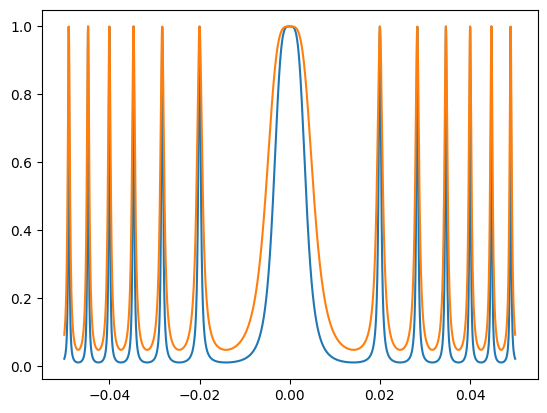

In [ ]:
plt.plot(psi,FP_RPa)
plt.plot(psi,FP_RPb)

In [ ]:
FP_RPa_peaks, _ = find_peaks(FP_RPa[2000:])
FP_RPb_peaks, _ = find_peaks(FP_RPb[2000:])

In [ ]:
num_peaks = np.min([len(FP_RPa_peaks),len(FP_RPb_peaks)])

In [ ]:
delta_peaks = []
for peak in range(num_peaks):
  delta_peaks.append(FP_RPa_peaks[peak]-FP_RPb_peaks[peak])

In [ ]:
print(delta_peaks)

[0, 0, 0, 0, 0, 0]


**The peaks do not move, but the peaks do become more narrow, with greater sharpness.**
